In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
from scipy.spatial import distance
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import datetime

## 2. Grouping songs together!

### 2.1 Getting your data!

In [11]:
echonest = pd.read_csv('echonest.csv')
features = pd.read_csv('features.csv')
tracks = pd.read_csv('tracks.csv')

In [12]:
print(echonest.shape)
print(features.shape)
print(tracks.shape)

(13129, 250)
(106574, 519)
(106574, 53)


In [13]:
# Merge the dataset in order to have information about echonest track (left merge - index of echonest)
# We merge with the key = 'track_id'
merged_df = pd.merge(pd.merge(echonest, features, on='track_id', how='left'), tracks, on='track_id', how='left')
# We store the merged dataset to avoid to compute it each time
merged_df.to_csv('merged_df.csv')

In [14]:
merged_df.describe()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_latitude,...,artist_id,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,9770.000000,...,13129.000000,8052.000000,8052.000000,13129.000000,13129.000000,13129.000000,13129.000000,1.312900e+04,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,39.961892,...,6303.865641,40.144635,-49.099826,248580.807068,0.044558,249.013558,4.310305,3.784447e+03,2147.068703,5.608500
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,15.554275,...,4974.103114,15.603089,57.881761,63834.230395,0.494095,207.268166,20.884705,3.396744e+04,9434.471644,6.108004
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,-45.867100,...,1.000000,-43.532054,-123.114034,-1.000000,0.000000,18.000000,0.000000,6.300000e+01,12.000000,0.000000
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,37.784827,...,2203.000000,37.871166,-85.111004,192000.000000,0.000000,156.000000,0.000000,6.700000e+02,299.000000,2.000000
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,40.781400,...,5442.000000,40.714550,-73.950000,256000.000000,0.000000,214.000000,1.000000,1.351000e+03,694.000000,4.000000
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,47.254575,...,9288.000000,47.218371,-0.045680,320000.000000,0.000000,282.000000,4.000000,2.948000e+03,1714.000000,8.000000
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,68.927500,...,20818.000000,65.201935,174.885971,448000.000000,37.000000,3033.000000,1482.000000,3.293557e+06,543252.000000,213.000000


In [15]:
merged_df.iloc[:, :100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   track_id                            13129 non-null  int64  
 1   audio_features_acousticness         13129 non-null  float64
 2   audio_features_danceability         13129 non-null  float64
 3   audio_features_energy               13129 non-null  float64
 4   audio_features_instrumentalness     13129 non-null  float64
 5   audio_features_liveness             13129 non-null  float64
 6   audio_features_speechiness          13129 non-null  float64
 7   audio_features_tempo                13129 non-null  float64
 8   audio_features_valence              13129 non-null  float64
 9   metadata_album_date                 2717 non-null   object 
 10  metadata_album_name                 2872 non-null   object 
 11  metadata_artist_latitude            9770

In [6]:
# to avoid to merge each time
merged_df = pd.read_csv('merged_df.csv')
merged_df.shape

(13129, 821)

### 2.2 Choose your features (variables)! TO DO

In [7]:
#drop columns with too few values (less than the half)
#drop the columns with 'genre' in the name

col_dropped=[]
for col in merged_df.columns:
    nb_missed = merged_df[col].isna().sum() 
    n = merged_df.shape[0]
    if nb_missed > 7500 :
        col_dropped.append(col)
        merged_df.drop([col], axis = 1, inplace = True)
    
    if 'genre' in col :
        col_dropped.append(col)
        merged_df.drop([col], axis = 1, inplace = True)


In [8]:
#print dropped column to be sure to not drop a very relevant attribute
print(col_dropped)

['metadata_album_date', 'metadata_album_name', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank', 'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank', 'album_engineer', 'album_producer', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_related_projects', 'artist_wikipedia_page', 'track_composer', 'track_date_recorded', 'track_genre_top', 'track_genres', 'track_genres_all', 'track_information', 'track_lyricist', 'track_publisher']


#### Encode the values

In [9]:
# for variables which represent dates we will use the datetime type and transform it in numerical values
res = []
for col in merged_df.columns:
    if ('date' in col) or ('year' in col):
        #print(col)
        #print(merged_df[[col]].isna().sum())
        merged_df[col] = pd.to_numeric(pd.to_datetime(merged_df[col], format = "%Y-%m-%d"))


In [10]:
merged_df.info(verbose = 1) # we have only 3 types : int, float or object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 799 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    Unnamed: 0                          int64  
 1    track_id                            int64  
 2    audio_features_acousticness         float64
 3    audio_features_danceability         float64
 4    audio_features_energy               float64
 5    audio_features_instrumentalness     float64
 6    audio_features_liveness             float64
 7    audio_features_speechiness          float64
 8    audio_features_tempo                float64
 9    audio_features_valence              float64
 10   metadata_artist_latitude            float64
 11   metadata_artist_location            object 
 12   metadata_artist_longitude           float64
 13   metadata_artist_name                object 
 14   metadata_release                    object 
 15   social_features_artist_discovery  

In [11]:
# store and encode object values + store numerical value in two different DataFrame
encoded_df = pd.DataFrame()
num_df = pd.DataFrame()

for col in merged_df.columns:
    
    #columns with non-numeric values
    if merged_df[col].dtype == object :
        #replace missing values by 'None'
        merged_df[col].fillna("None", inplace = True)  
        le = preprocessing.LabelEncoder()
        encoded_df[col]= le.fit_transform(merged_df[col])
    
    #columns with numeric values
    else :
        #replace missing values by the mean of the column
        #if (merged_df[col].dtype == float) or (merged_df[col].dtype == int):
        merged_df[col].fillna(merged_df[col].mean(), inplace = True)
        num_df[col] = merged_df[col]
        

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [12]:
print('merged_df' , merged_df.shape)
print('encoded_df' , encoded_df.shape)
print('num_df' , num_df.shape)

merged_df (13129, 799)
encoded_df (13129, 19)
num_df (13129, 780)


#### Apply PCA only to numerical values

In [13]:
#normalize for ACP
X1 = num_df.to_numpy()
Z1 = preprocessing.StandardScaler().fit_transform(X1) # normalize

#pca = PCA(n_components=Z.shape[1])
pca = PCA(n_components = 68)
A = pca.fit_transform(Z1)

In [14]:
#print(pca.explained_variance_ratio_)
print("The partial variance is equal to :", np.cumsum(pca.explained_variance_ratio_)[-1])

The partial variance is equal to : 0.7002293167407463


#### Normalize the object dataset

In [15]:
X2 = encoded_df.to_numpy()
Z2 = preprocessing.StandardScaler().fit_transform(X2)

In [16]:
Z2.shape

(13129, 19)

In [17]:
A.shape

(13129, 68)

In [18]:
# final reducted matrix
Z = np.hstack((A, Z2))
Z.shape

(13129, 87)

### 2.3 Clustering!

#### Implement KMeans Algorithm with random initialization

In [19]:
def KMeans(X, k, max_it = 100):
    #choose randomly points of X to initialize our centroids
    ind_centroids = random.sample(range(len(X)),k)
    #initialization of the centroids
    centroids = X[ind_centroids, :]
    #init the associated cluster for each point
    previous_clusters = [np.full(len(X), -1)]
    clusters = np.full(len(X), -1)
    
    distances = np.array([np.linalg.norm(X - centroids[i], axis = 1) for i in range(k)]).T
    clusters = np.argmin(distances, axis = 1)
    count = 0
    while (clusters != previous_clusters[-1]).any() and (count <= max_it):
        previous_clusters.append(clusters)
        # update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[clusters==j,:], axis=0)
        distances = np.array([np.linalg.norm(X - centroids[i], axis = 1) for i in range(k)]).T
        clusters = np.argmin(distances, axis = 1)
        count+=1
        
    return clusters, centroids, count

#### Test Kmeans algorithm

In [20]:
#test


# TO DELETE



dataset = pd.read_csv('iris.csv')

clusters, _, _ = KMeans(dataset[['petal.width', 'petal.length']].to_numpy(), 3, max_it = 100)

from sklearn.metrics import confusion_matrix
y_true = []
for el in dataset.variety:
    if el == 'Setosa':
        y_true.append(0)
    elif el == 'Virginica':
        y_true.append(1)
    else:
        y_true.append(2)
confusion_matrix(y_true, clusters)

# it work

array([[50,  0,  0],
       [ 0,  6, 44],
       [ 0, 48,  2]], dtype=int64)

In [21]:
random.seed(0)
%time clusters, centroids, count = KMeans(Z, 3, max_it = 100)
# i dont understand why the algo running is longer for normalized values

Wall time: 938 ms


In [22]:
clusters

array([0, 0, 0, ..., 2, 0, 1], dtype=int64)

#### Method to find an optimal number of clusters
1. Elbow method

In [23]:
def compute_elbow(X, cluster_labels, centroids):
    C = np.array([centroids[k] for k in cluster_labels])
    dist = np.linalg.norm(X-C, axis = 1)
    S = np.sum(dist)
    return S

In [24]:
def elbow_method(X, k_min, k_max):
    inertia = []
    K = []
    for k in range(k_min, k_max + 1):
        cluster_labels, centroids, count  = KMeans(X,k)
        S = compute_elbow(X, cluster_labels, centroids)
        inertia.append(S)
        K.append(k)
        print(k)
    plt.plot(K, inertia)
    plt.show()
    return K, inertia

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


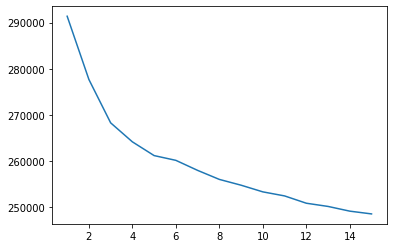

In [25]:
K, inertia = elbow_method(Z, 1, 15)

2. Silhouette score

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [26]:
def silhouette_score(X, cluster_labels, centroids):
    C = np.array([centroids[k] for k in cluster_labels])
    
    #Compute the average of distances between each point and its centroid
    dist = np.linalg.norm(X-C, axis = 1)
    intra_cluster = np.mean(dist)
    
    #Compute the average of distances between each centroid
    L=[]
    for i in range(len(centroids)) : 
        c1 = centroids[i]
        for j in range(i+1, len(centroids)) : # avoid to compute the distance twice
            c2 = centroids[j]
            if (c1 != c2).any() :
                L.append(np.linalg.norm(c1-c2))
    inter_cluster = np.mean(np.array(L))
    
    silhouette_score = (inter_cluster - intra_cluster) / max(intra_cluster, inter_cluster)
    return silhouette_score
    

In [27]:
def silhouette_method(X, k_min, k_max):
    silhouette_scores = []
    K = []
    for k in range(k_min, k_max + 1):
        cluster_labels, centroids, count  = KMeans(X,k)
        #S = silhouette_score(X, cluster_labels, centroids)
        S = sklearn.metrics.silhouette_score(X, cluster_labels)
        silhouette_scores.append(S)
        K.append(k)
        print(k)
    plt.plot(K, silhouette_scores)
    plt.show()
    return K, silhouette_scores

On Z, reduced data with ACP

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

2


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

3


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

4


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

5


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

6


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

7


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

8


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

9


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

10


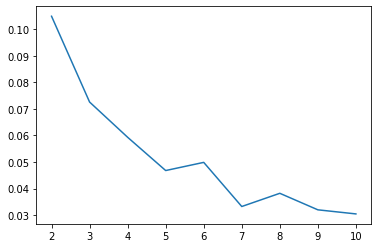

In [28]:
K, silhouette_scores = silhouette_method(Z, 2, 10)

**With the elbow method we can see where we have a shortage of the curve and choose the optimal number of clusters. Obsiouly, the silhouette does not seem to work with our dataset...** 

So finally, we choose **6 clusters** to work.


#### Clustering with KMeans ++

In [72]:
kmeans = cluster.KMeans(n_clusters=5, init = 'k-means++').fit(Z)

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\aurel\Downloads\Anaconda3\lib\site-

In [73]:
kmeans_plus_pred = kmeans.labels_

In [74]:
kmeans_random_pred = KMeans(Z, 5, max_it = 100)

In [75]:
print('Kmeans ++ :', kmeans_plus_pred[:100])
print('Kmeans hom:', kmeans_random_pred[0][:100])

Kmeans ++ : [0 0 0 4 0 2 3 3 3 4 2 3 2 4 1 2 4 4 4 4 2 4 4 4 4 2 4 1 3 3 0 3 3 3 1 1 3
 3 3 2 1 3 3 3 1 3 3 2 3 3 3 3 2 2 0 3 3 2 2 3 2 4 4 2 2 3 3 2 3 3 3 2 0 2
 3 0 3 3 3 0 3 0 3 3 3 2 2 0 0 3 3 3 3 4 2 3 0 3 3 3]
Kmeans hom: [0 1 1 2 1 0 4 4 4 2 0 4 0 2 4 0 2 2 0 2 0 2 2 2 2 0 2 3 4 3 1 4 4 4 3 3 4
 4 4 0 3 3 4 4 3 4 4 0 4 4 4 4 0 0 1 4 4 0 0 4 0 2 2 0 0 4 4 0 4 4 4 0 1 0
 4 1 4 4 4 1 4 1 4 4 4 0 0 1 1 4 4 4 4 0 0 4 1 4 4 4]


### Analyse the result and compare it

We compute the confusion matrix to show if the clusters obtained with the two methos are the same or almost the same.

In [76]:
# Confusion matrix 
KM_plus = []
for el in kmeans_plus_pred:
    KM_plus.append(el)
    
confusion_matrix(KM_plus, kmeans_random_pred[0])


array([[  23, 3095,    0,    0,    2],
       [   3,    0,    4,  911,   10],
       [4224,   10,    0,    0,   62],
       [   0,   13,    0,   22, 2592],
       [  76,    1, 2081,    0,    0]], dtype=int64)

With this matrix we can conclude that there are some little differences. 
The clusters found with the random initialization are quite the same as those found with Kmeans++. The differences are due to the initialization of the cluster's centers

### 2.4 Analysing your results!

#### Choose relevant attributes
* 'track_language_code' --> Language
* 'track_duration' --> Duration
* 'track_date_created' or 'track_date_recorded' or 'album_date_created' or 'album_date_created' --> Date
* ~~'artist_location'~~,  'metadata_artist_location'--> Country/Region/State
*  'artist_name'--> Artist
* 'artist_associated_labels' --> Label
* ??? 'artist_active_year_begin','artist_active_year_end' ???
* ~~'track_composer' --> Composer~~
* ~~'track_lyricist' --> Lyricist~~


#### Numerical variables --> 4 categories 

In [111]:
merged_df_bis = pd.read_csv('merged_df.csv')

# for variables which represent dates we will use the datetime type
res = []
for col in merged_df_bis.columns:
    if ('date' in col) or ('year' in col):
        merged_df_bis[col] = pd.to_numeric(pd.to_datetime(merged_df_bis[col], format = "%Y-%m-%d"))


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (811,816,818) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [112]:
relevant_variables = merged_df_bis[['track_language_code', 'track_duration', 'track_date_created', 'metadata_artist_location', 'artist_name']]

In [113]:
relevant_variables.head()

,track_language_code,track_duration,track_date_created,metadata_artist_location,artist_name
0,en,168,1227664092000000000,"Georgia, US",AWOL
1,en,237,1227664094000000000,"Georgia, US",AWOL
2,en,206,1227664100000000000,"Georgia, US",AWOL
3,en,161,1227635346000000000,"Philadelphia, PA, US",Kurt Vile
4,en,207,1227663799000000000,"Georgia, US",AWOL


In [114]:
relevant_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   track_language_code       5823 non-null   object
 1   track_duration            13129 non-null  int64 
 2   track_date_created        13129 non-null  int64 
 3   metadata_artist_location  9770 non-null   object
 4   artist_name               13129 non-null  object
dtypes: int64(2), object(3)
memory usage: 513.0+ KB


We have two possibilities to split our numerical values in 4 categories :
- either we make categories with the same width, but we will have representation (i mean numbers of values in each categories) very different
- or we make categories with the same number of values, but the width of the categories will more or less big

**We chose to use categories with different width but with the same number of points to be more relevant.**

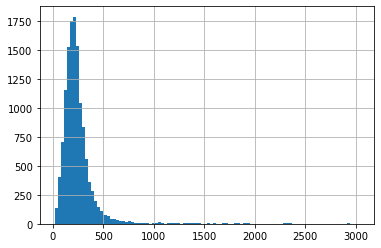

In [115]:
# 'track_duration' is integer/numerical variable so we have to make 4 categories 
relevant_variables['track_duration'].hist(bins = 100)
plt.show()


In [137]:
# 'track_date_created' is integer/numerical variable so we have to make 4 categories 
#relevant_variables['track_date_created'] = preprocessing.StandardScaler().fit_transform(relevant_variables[['track_date_created']].to_numpy())

col = relevant_variables['track_duration']

threshold_0 = col.min()
threshold_1 = sorted(col)[len(col)//4]
threshold_2 = sorted(col)[len(col)//4 * 2]
threshold_3 = sorted(col)[len(col)//4 * 3]
threshold_4 = col.max()

print("threshold_0 =", threshold_0)
print("threshold_1 =",threshold_1)
print("threshold_2 =",threshold_2)
print("threshold_3 =",threshold_3)
print("threshold_4 =",threshold_4)

relevant_variables['track_duration_categories'] = 0
relevant_variables['track_duration_categories'].loc[(threshold_0 <= col) & (col < threshold_1)] = 1
relevant_variables['track_duration_categories'].loc[(threshold_1 <= col) & (col < threshold_2)] = 2
relevant_variables['track_duration_categories'].loc[(threshold_2 <= col) & (col < threshold_3)] = 3
relevant_variables['track_duration_categories'].loc[(threshold_3 <= col) & (col <= threshold_4)] = 4

threshold_0 = 18
threshold_1 = 156
threshold_2 = 214
threshold_3 = 282
threshold_4 = 3033


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


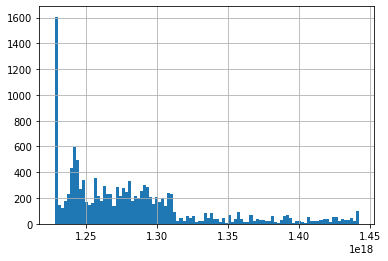

In [138]:
# 'track_date_created' is integer/numerical variable so we have to make 4 categories 
#relevant_variables['track_date_created'] = preprocessing.StandardScaler().fit_transform(relevant_variables[['track_date_created']].to_numpy())
relevant_variables['track_date_created'].hist(bins = 100)


In [151]:
# 'track_date_created' is integer/numerical variable so we have to make 4 categories 
#relevant_variables['track_date_created'] = preprocessing.StandardScaler().fit_transform(relevant_variables[['track_date_created']].to_numpy())

col = relevant_variables['track_date_created']

threshold_0 = col.min()
threshold_1 = sorted(col)[len(col)//4]
threshold_2 = sorted(col)[len(col)//4 * 2]
threshold_3 = sorted(col)[len(col)//4 * 3]
threshold_4 = col.max()

print(datetime.datetime.fromtimestamp(threshold_0 / 1e9))
print(datetime.datetime.fromtimestamp(threshold_1 / 1e9))
print(datetime.datetime.fromtimestamp(threshold_2 / 1e9))
print(datetime.datetime.fromtimestamp(threshold_3 / 1e9))
print(datetime.datetime.fromtimestamp(threshold_4 / 1e9))


relevant_variables['track_date_created_categories'] = 0
relevant_variables['track_date_created_categories'].loc[(threshold_0 <= col) & (col < threshold_1)] = 1
relevant_variables['track_date_created_categories'].loc[(threshold_1 <= col) & (col < threshold_2)] = 2
relevant_variables['track_date_created_categories'].loc[(threshold_2 <= col) & (col < threshold_3)] = 3
relevant_variables['track_date_created_categories'].loc[(threshold_3 <= col) & (col <= threshold_4)] = 4

2008-11-25 18:49:06
2009-05-15 18:55:43
2010-04-09 15:05:48
2011-03-06 07:20:57
2015-09-11 14:10:09


C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### add the prediction of the clusters

In [120]:
merged_df_bis['pred_clusters'] = kmeans_random_pred[0]
relevant_variables['pred_clusters'] = kmeans_random_pred[0]
relevant_variables['Unnamed: 0']= merged_df_bis['Unnamed: 0']

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Create the pivot tables

In [121]:
variables = ['track_language_code', 'track_duration_categories', 'track_date_created_categories', 'metadata_artist_location', 'artist_name'] # 
pivot_tables = []
for var in variables :
    table = pd.pivot_table(relevant_variables, index = var,  values= 'Unnamed: 0',
                           columns = ['pred_clusters'], aggfunc = 'count', fill_value=0)
    table = table.apply(lambda col : col/sum(col)*100).round(2)
    pivot_tables.append((var, table))
    

In [122]:
for i in range(len(variables)):
    print('Pivot Tables of the variables :', pivot_tables[i][0], '\n')
    print(pivot_tables[i][1], '\n\n\n')

Pivot Tables of the variables : track_language_code 

pred_clusters            0      1      2     3      4
track_language_code                                  
ar                    0.00   0.08   0.00   0.0   0.34
bm                    0.00   0.00   0.00   0.0   0.09
cs                    0.05   0.00   0.11   0.0   0.00
de                    0.16   0.00   0.00   0.0   0.09
el                    0.05   0.00   0.42   0.0   0.00
en                   95.61  93.88  96.50  99.8  96.15
es                    2.09   3.33   1.80   0.2   1.03
fi                    0.00   0.00   0.00   0.0   0.26
fr                    0.05   1.24   0.00   0.0   0.34
it                    0.21   0.23   0.11   0.0   0.43
ja                    0.00   0.23   0.00   0.0   0.00
ko                    0.00   0.00   0.11   0.0   0.00
pt                    0.26   0.93   0.11   0.0   0.68
ru                    0.42   0.08   0.21   0.0   0.00
sr                    0.21   0.00   0.21   0.0   0.00
sw                    0.16  

#### Analysis of tables  
### TO DO

##### Pivot Tables of the variables : track_language_code 
    
With this pivot table which shows the link between the language of the songs, we can tell that :

- English songs (en) represent a great majority of songs in each clusters
- The **cluster n°3** is represented with almost only **english songs**- en (99.8 %)
- Some languages are in the only one cluster : for example :
    - "bm" "fi" in clusters 4,
    - "ja" (japanese) in cluster 1,
    - "ko" in cluster 3
    
  So it means that the songs of **those language are easy to classify**.

Finally, the language of a song can be a very relevant indicators to choose the clusters, except for english song because there is to many songs in this languages to differentiate it. 
    

##### Pivot Tables of the variables : track_duration_categories 

We divided this attributes in four categories. The duration of the songs increases with the number of the category.
We can tell that :
- In the cluster 2 the duration tends to be shorter. Indeed, almost 45% the songs of this clusters have a duration in the first category, the shortest (less than 156s). Also for cluster 3, the music are "short" : 69% of songs under 214s. 
- In contrary, in the clusters 1 and 4 the duration tends to be longer. Indeed, almost 60% for cluster 1 and 62% for cluster 4 of the songs have a duration in the categories 3 and 4, the longest (more than 214s)
- For cluster 0, the duration is better distributed.


##### Pivot Tables of the variables : track_date_created_categories 

We divided this attributes in four categories. The date of creation of the songs increases with the number of the category.
We sould note that there is a lot of None-value for this attributes. 
We can tell that :
- In cluster 0, the songs seem to have more often one of oldest or most recent date of creation of the dataset, before May 200ç and after March 2011.
- In the cluster 1, it is more in the middle of date of creation (categories 2 and 3)
- In the cluster 2, the songs seem to have more often one of oldest or most recent date of creation of the dataset. 
- In the cluster 3, it is more in the category 2 (between May 2009 and April 2010)
- In cluster 4, the date of creation is better distributed.


# TO continue

#### 2.4.6. Compare the obtained clusters to the reality genre

In [162]:
table = pd.pivot_table(merged_df_bis, index = 'track_genre_top',  values= 'Unnamed: 0',
                           columns = ['pred_clusters'], aggfunc = 'count', fill_value=0)
table = table.apply(lambda col : col/sum(col)*100).round(2)
table

pred_clusters,0,1,2,3,4
track_genre_top,,,,,
Blues,2.11,0.28,0.00,0.64,0.34
Classical,4.40,23.93,0.18,0.29,0.14
Electronic,16.91,5.95,17.49,12.88,54.51
Experimental,0.29,0.28,0.12,0.19,0.10
Folk,28.40,13.97,2.49,6.81,1.06
Hip-Hop,2.23,0.14,5.33,6.01,28.48
Instrumental,1.89,0.83,0.47,0.87,0.48
International,2.57,0.83,1.01,1.57,0.77
Jazz,7.54,2.49,1.13,1.54,1.15


#### 2.4.7 KMeans ++ Analysis

In [163]:
df = pd.merge(features, tracks, on='track_id', how='left')

In [166]:
#drop columns with too few values (almost the half)
col_dropped=[]
for col in df.columns:
    nb_missed = df[col].isna().sum() 
    n = df.shape[0]
    if nb_missed > 50000 :
        print(col)
        col_dropped.append(col)
        df.drop([col], axis = 1, inplace = True)

# for variables which represent dates we will use the datetime type
res = []
for col in df.columns:
    if ('date' in col) or ('year' in col):
        df[col] = pd.to_numeric(pd.to_datetime(df[col], format = "%Y-%m-%d %H:%M:%S"))
        
# store and encode object values + store numerical value in two different DataFrame
encoded_df2 = pd.DataFrame()
num_df2 = pd.DataFrame()

for col in df.columns:
    
    #columns with non-numeric values
    if df[col].dtype == object :
        #replace missing values by 'None'
        df[col].fillna("None", inplace = True)  
        le = preprocessing.LabelEncoder()
        encoded_df2[col]= le.fit_transform(merged_df[col])
    
    #columns with numeric values
    else :
        #replace missing values by the mean of the column
        df[col].fillna(df[col].mean(), inplace = True)
        num_df2[col] = merged_df[col]

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [174]:
#normalize for ACP
X1 = num_df2.to_numpy()
Z1 = preprocessing.StandardScaler().fit_transform(X1) # normalize

pca = PCA(n_components=51)
A = pca.fit_transform(Z1)

In [177]:
print("The partial variance is equal to :", np.cumsum(pca.explained_variance_ratio_)[-1])

The partial variance is equal to : 0.7030066258622892


In [179]:
X2 = encoded_df2.to_numpy()
Z2 = preprocessing.StandardScaler().fit_transform(X2)

# final reducted matrix
Z2 = np.hstack((A, Z2))
Z2.shape

(13129, 67)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


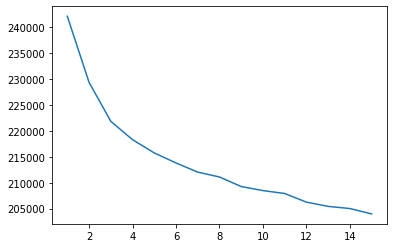

In [180]:
K, inertia = elbow_method(Z2, 2, 15)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


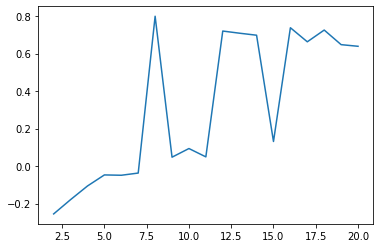

In [183]:
K, silhouette_scores = silhouette_method(Z, 2, 20)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


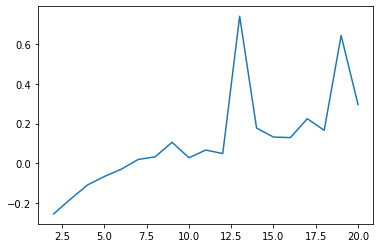

In [184]:
K, silhouette_scores = silhouette_method(Z, 2, 20)

In [ ]:
# Find 5-10 optimal variables












## 3. Algorithmic questions

In [10]:
def pairs(A,s):
    res=[]
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            if A[i]+A[j] == s:
                res.append((A[i],A[j]))
    return res

In [11]:
A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3] 
s = 4

print(*pairs(A,s))

(7, -3) (-2, 6) (2, 2) (1, 3)


In [ ]:
#add comments about complexity and ideas